## Lab 3
### Regresja Logistyczna
#### Autor: Franciszek

In [38]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from copy import deepcopy

In [39]:
def sigmoid(y):
    return 1.0 / (1.0 + np.exp(-y))

In [40]:
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    z = np.matmul(theta.T, X)
    h = 1.0 / (1.0 + np.exp(-z))
    return h

In [41]:
def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = X.shape[1]
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / m

In [42]:
def computeDerivativeMultivariable(X, Y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    n,m = X.shape # number of features, number of examples
    
    diff = (h_fun(X, theta) - Y)
    gradient = np.matmul(diff, X.T)
    gradient = gradient / m

    return gradient.T

In [43]:
def LogisticRegression(X, Y, theta_in, learningRate, epsilon):
    i = 0
    costList = []
    derivatveList = []
    thetaList = []

    theta = deepcopy(theta_in)

    while(i < 2 or abs((costList[i-1] - costList[i-2])) > epsilon):
        derivative = computeDerivativeMultivariable(X, Y, theta)
        derivatveList.append(derivative)

        theta = theta - learningRate * derivative
        thetaList.append(theta)

        cost = calculate_cost(X, Y, theta)
        costList.append(cost)
        
        print(f"Iteration: {i}, Cost: {costList[-1]}")

        i += 1

    return [theta, i, costList]

In [44]:
def computeResult(theta, example, X_scale, y_scale):
    return sigmoid(np.matmul(theta.T, example/X_scale) * y_scale)

In [45]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

theta_in = np.zeros((2, 1))
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

In [46]:
theta, i, costList = LogisticRegression(X, y, theta_in, alpha, eps)

Iteration: 0, Cost: 0.6926401974300688
Iteration: 1, Cost: 0.6921358991700808
Iteration: 2, Cost: 0.6916342706020859
Iteration: 3, Cost: 0.6911352966185673
Iteration: 4, Cost: 0.6906389621823789
Iteration: 5, Cost: 0.6901452523267303
Iteration: 6, Cost: 0.6896541521551666
Iteration: 7, Cost: 0.6891656468415415
Iteration: 8, Cost: 0.6886797216299851
Iteration: 9, Cost: 0.6881963618348654
Iteration: 10, Cost: 0.6877155528407443
Iteration: 11, Cost: 0.6872372801023281
Iteration: 12, Cost: 0.6867615291444126
Iteration: 13, Cost: 0.6862882855618226
Iteration: 14, Cost: 0.6858175350193463
Iteration: 15, Cost: 0.6853492632516637
Iteration: 16, Cost: 0.6848834560632716
Iteration: 17, Cost: 0.6844200993284019
Iteration: 18, Cost: 0.6839591789909356
Iteration: 19, Cost: 0.6835006810643122
Iteration: 20, Cost: 0.683044591631434
Iteration: 21, Cost: 0.6825908968445664
Iteration: 22, Cost: 0.6821395829252317
Iteration: 23, Cost: 0.6816906361641017
Iteration: 24, Cost: 0.6812440429208833
Iteration: 

Iteration: 2925, Cost: 0.5181911173725271
Iteration: 2926, Cost: 0.5181664335102267
Iteration: 2927, Cost: 0.5181417525704838
Iteration: 2928, Cost: 0.5181170745528535
Iteration: 2929, Cost: 0.5180923994568913
Iteration: 2930, Cost: 0.5180677272821531
Iteration: 2931, Cost: 0.5180430580281945
Iteration: 2932, Cost: 0.5180183916945713
Iteration: 2933, Cost: 0.5179937282808402
Iteration: 2934, Cost: 0.5179690677865572
Iteration: 2935, Cost: 0.5179444102112786
Iteration: 2936, Cost: 0.5179197555545615
Iteration: 2937, Cost: 0.5178951038159625
Iteration: 2938, Cost: 0.5178704549950385
Iteration: 2939, Cost: 0.5178458090913469
Iteration: 2940, Cost: 0.5178211661044452
Iteration: 2941, Cost: 0.5177965260338905
Iteration: 2942, Cost: 0.5177718888792409
Iteration: 2943, Cost: 0.517747254640054
Iteration: 2944, Cost: 0.5177226233158879
Iteration: 2945, Cost: 0.5176979949063008
Iteration: 2946, Cost: 0.517673369410851
Iteration: 2947, Cost: 0.517648746829097
Iteration: 2948, Cost: 0.517624127160

In [66]:
print(theta.shape)
data = np.reshape(X[1, :], [-1, 8])
print(data.shape)
print(y.shape)
tempX = np.vstack([np.ones([1, 100]), np.linspace(0, 7, 100)])
result = computeResult(theta, tempX, 1, 1)
tempX = np.reshape(tempX[1, :], [1, -1])
result = np.reshape(result, [-1, 100])
print(result.shape)

(2, 1)
(1, 8)
(100,)
(1, 100)


ValueError: x and y must be the same size

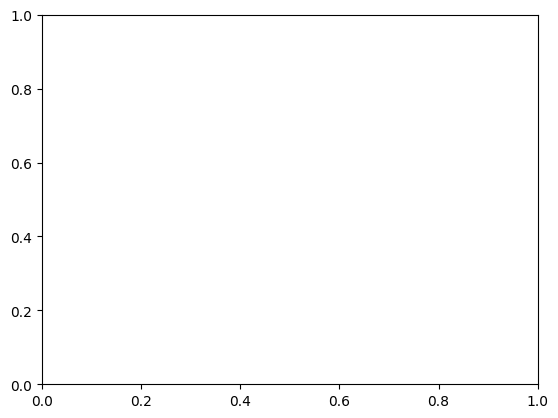

In [67]:
plt.figure()
plt.scatter(data, y)
plt.plot(tempX, result)
plt.show()